In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Style Transfer Setup
We'll be using a model from TensorFlow Hub simply because it was the quickest way I found to do this. PyTorch implementation was painfully long. Using TF should not matter here since we're only preparing a dataset using it.

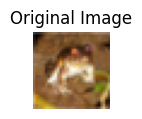

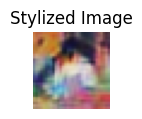

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Display the original content image
plt.figure(figsize=(1, 1))
plt.imshow(train_images[0])
plt.axis('off')
plt.title('Original Image')
plt.show()


# Preprocess the content image (first image from the dataset)
content_image = train_images[0]
content_image = content_image.astype(np.float32) / 255.0  # Normalize to [0,1]
content_image = np.expand_dims(content_image, axis=0)     # Add batch dimension

# Step 2: Load a style image from the internet
style_image_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
# Function to load and preprocess the style image
def load_style_image(image_path):
    max_dim = 512
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize to [0,1]

    # Resize the image while maintaining aspect ratio
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

style_image = load_style_image(style_image_path)

# Step 3: Load the style transfer model from TensorFlow Hub
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Step 4: Apply the style to the content image
stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]

# Function to convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = tf.clip_by_value(tensor, 0, 255)
    tensor = tf.cast(tensor, tf.uint8)
    tensor = tensor[0]  # Remove batch dimension
    return Image.fromarray(tensor.numpy())

# Step 5: Display the stylized image
stylized_image_pil = tensor_to_image(stylized_image)

plt.figure(figsize=(1, 1))
plt.imshow(stylized_image_pil)
plt.axis('off')
plt.title('Stylized Image')
plt.show()


## Extending this to all Images

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Step 2: Load a style image from the internet
style_image_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# Function to load and preprocess the style image
def load_style_image(image_path):
    max_dim = 512
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Normalize to [0,1]

    # Resize the image while maintaining aspect ratio
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    scale = max_dim / max(shape)
    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

style_image = load_style_image(style_image_path)

# Function to convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = tf.clip_by_value(tensor, 0, 255)
    tensor = tf.cast(tensor, tf.uint8)
    tensor = tensor[0]  # Remove batch dimension
    return Image.fromarray(tensor.numpy())



# Step 3: Load the style transfer model from TensorFlow Hub
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


# Step 1: Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


print(len(test_images))

styled_images_PIL = []
i = 0
for content_image in test_images:
  content_image = content_image.astype(np.float32) / 255.0  # Normalize to [0,1]
  content_image = np.expand_dims(content_image, axis=0)     # Add batch dimension
  stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]
  stylized_image_pil = tensor_to_image(stylized_image)
  styled_images_PIL.append(stylized_image_pil)
  print(f"Batch {i} done")
  i += 1
  if(i == 1000): # ONLY TRANSFORMING 1000 IMAGES
    break



tensor = VIT_PreProcess(images=styled_images_PIL, return_tensors='pt')

print(tensor["pixel_values"].shape)



# def collate_fn_0(batch):
#     images, labels = zip(*batch)
#     inputs = []
#     for img in images:
#       inputs.append(scrambler(img, no_scramble_order))
#     # inputs = [tensorify(img) for img in inputs]
#     # inputs = torch.stack(inputs)
#     inputs = VIT_PreProcess(images=inputs, return_tensors='pt')
#     labels = torch.tensor(labels)
#     return inputs["pixel_values"], labels


# def collate_fn_0(batch):
#     images, labels = zip(*batch)
#     inputs = []
#     for img in images:
#       inputs.append(scrambler(img, no_scramble_order))
#     # inputs = [tensorify(img) for img in inputs]
#     # inputs = torch.stack(inputs)
#     inputs = VIT_PreProcess(images=inputs, return_tensors='pt')
#     labels = torch.tensor(labels)
#     return inputs["pixel_values"], labels


# from PIL import Image
# from torch.utils.data import Dataset, DataLoader
# import torchvision.transforms as transforms

# # Custom Dataset class
# class ImageDataset(Dataset):
#     def __init__(self, pil_images, transform=None):
#         self.pil_images = pil_images  # List of PIL images
#         self.transform = transform

#     def __len__(self):
#         return len(self.pil_images)

#     def __getitem__(self, idx):
#         image = self.pil_images[idx]

#         if self.transform:
#             image = self.transform(image)

#         return image

# # Example usage
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# ])

# # Create dataset
# dataset = ImageDataset(styled_images_PIL, transform=transform)

# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# # Iterate over DataLoader
# for batch in dataloader:
#     print(batch.size())  # Example processing


# # Setting Up Data Loaders
# cnn_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn_0)





10000
Batch 0 done
Batch 1 done
Batch 2 done
Batch 3 done
Batch 4 done
Batch 5 done
Batch 6 done
Batch 7 done
Batch 8 done
Batch 9 done
Batch 10 done
Batch 11 done
Batch 12 done
Batch 13 done
Batch 14 done
Batch 15 done
Batch 16 done
Batch 17 done
Batch 18 done
Batch 19 done
Batch 20 done
Batch 21 done
Batch 22 done
Batch 23 done
Batch 24 done
Batch 25 done
Batch 26 done
Batch 27 done
Batch 28 done
Batch 29 done
Batch 30 done
Batch 31 done
Batch 32 done
Batch 33 done
Batch 34 done
Batch 35 done
Batch 36 done
Batch 37 done
Batch 38 done
Batch 39 done
Batch 40 done
Batch 41 done
Batch 42 done
Batch 43 done
Batch 44 done
Batch 45 done
Batch 46 done
Batch 47 done
Batch 48 done
Batch 49 done
Batch 50 done
Batch 51 done
Batch 52 done
Batch 53 done
Batch 54 done
Batch 55 done
Batch 56 done
Batch 57 done
Batch 58 done
Batch 59 done
Batch 60 done
Batch 61 done
Batch 62 done
Batch 63 done
Batch 64 done
Batch 65 done
Batch 66 done
Batch 67 done
Batch 68 done
Batch 69 done
Batch 70 done
Batch 71 d

RuntimeError: Parent directory ./content/drive/MyDrive does not exist.

In [ ]:
torch.save(tensor["pixel_values"], '/content/drive/MyDrive/styled_tensors_VIT.pt')

## Creating a New DataSet

## Setup && Installations

In [ ]:
import torch
from transformers import ViTForImageClassification
from transformers import AutoImageProcessor
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
import numpy as np
import tensorflow_hub as hub
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

import random

# drive.mount('/content/drive')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATCH_SIZE = 256

## Import && load the relevant models

In [ ]:
# VIT Model
VIT_model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")
CIFAR10_state_dict = torch.load("/content/drive/MyDrive/AdvMLPA1-01-VIT.pth", map_location=device)
VIT_model.load_state_dict(CIFAR10_state_dict, strict=False)

# VIT Preprocessor\
VIT_PreProcess = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

<ipython-input-4-1a98a63a7175>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  CIFAR10_state_dict = torch.load("/content/drive/MyDrive/AdvMLPA1-01-VIT.pth", map_location=de

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
# CNN Model

In [ ]:
# Clip Model

## Running Inference on 1000 samples
We'll start with ViT

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

imgs = torch.load("/content/drive/MyDrive/styled_tensors_VIT.pt")
split_tensors = torch.split(imgs, 200, dim=0)
split_labels = torch.split(torch.from_numpy(test_labels[0:1000]).squeeze(), 200)

VIT_model.to(device)

correct = 0
total = 0

with torch.no_grad():
  VIT_model.eval()

  for i, tensor in enumerate(split_tensors):
    labels = split_labels[i]
    inputs = tensor.to(device)
    labels = labels.to(device)

    outputs = VIT_model(pixel_values=inputs)
    _, predicted = torch.max(outputs.logits.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    print(f"Batch {i}: {correct}/{total} Correct")

    acc = 100 * correct / total

  print("Accuracy for Style Transfer: ", acc)


<ipython-input-14-79030965c053>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  imgs = torch.load("/content/drive/MyDrive/styled_tensors_VIT.pt")


Batch 0: 16/200 Correct
Batch 1: 36/400 Correct
Batch 2: 60/600 Correct
Batch 3: 83/800 Correct
Batch 4: 111/1000 Correct
Accuracy for Style Transfer:  11.1


Viewing a few samples and their labels:

dog


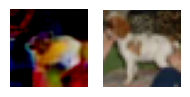

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
control_index = 12


image2 = test_images[control_index]
print(classes[test_labels[control_index][0]])
image1 = imgs[control_index].permute(1, 2, 0).numpy()


fig, axes = plt.subplots(1, 2, figsize=(2, 2))  # Adjust figsize to control overall size

# Display the first image in the first subplot
axes[0].imshow(image1)
axes[0].axis('off')  # Hide axis for a cleaner display

# Display the second image in the second subplot
axes[1].imshow(image2)
axes[1].axis('off')  # Hide axis for a cleaner display

# Show the plot
plt.tight_layout()
plt.show()